Sprintg 22 | Exam 2 | Hands-on Activities


*   Each student MUST implement **Python code as their responses** for all hands-on activities.  That's how each activity will be graded.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error, json
import pandas as pd
import requests
import re


[1][10 Points] Create a new DataFrame (**df**) from the provided dataset, **salaries-14B.csv**.  The **df** should only contain a subset of data from the csv file, and it will be utilized by a set of the subsequence questions.
*   The **df** should contain only 500 rows and columns of intormation from the data file (NOT the entire file).  
*   Your data (rows of information) should be similar, but it **will most likely not** match my extracted data (as shown).  

In [2]:
# STU TODO: Create a new df as specified by -
# + import (only) a subset of data (500 rows of ID, Title, Pay, Other Pay, Benefits and Employment) from the csv data file
# + display the info

df = pd.read_csv('salaries-14B.csv').head(500)
df.info()

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            500 non-null    int64  
 1   Title         500 non-null    object 
 2   Pay           500 non-null    float64
 3   OT Pay        500 non-null    float64
 4   Other Pay     500 non-null    float64
 5   Benefits      500 non-null    float64
 6   Compensation  500 non-null    float64
 7   Employment    500 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 31.4+ KB


,ID,Title,Pay,OT Pay,Other Pay,Benefits,Compensation,Employment
0,110532,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,510732.68,PT
1,110533,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,479652.21,HOURLY
2,110534,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,436224.36,PT
3,110535,Chief of Police,307450.04,0.00,19266.72,91302.46,418019.22,FT
4,110536,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,417435.10,FT
...,...,...,...,...,...,...,...,...
495,111027,"Captain, Emergency Med Svcs",148162.59,35333.35,21059.75,50681.68,255237.37,FT
496,111028,Senior Physician Specialist,198874.00,0.00,0.00,56331.21,255205.21,FT
497,111029,Nursing Supervisor,180906.58,0.00,18090.66,56205.61,255202.85,FT
498,111030,"Lieutenant, Fire Suppression",135225.54,64223.04,9780.84,45961.56,255190.98,FT


[2][10 Points] Compute the total pay of each "person (ID)".  Total Pay = Pay + Other Pay.



In [3]:
#
# STU To Do: Create a new colum ToTal Pay = Pay + Other Pay
#
Total_Pay = df["Pay"] + df["Other Pay"]
df["Total Pay"] = Total_Pay
df.head()

,ID,Title,Pay,OT Pay,Other Pay,Benefits,Compensation,Employment,Total Pay
0,110532,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,510732.68,PT,471952.64
1,110533,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,479652.21,HOURLY,379399.03
2,110534,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,436224.36,PT,339653.70
3,110535,Chief of Police,307450.04,0.00,19266.72,91302.46,418019.22,FT,326716.76
4,110536,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,417435.10,FT,326233.44


[3][10 Points] Create the following chart using the **df**.  Blue represents the Total Pay, while Orange represents the Benefits.  (Your colors can be different).  Be sure to specify the chart title

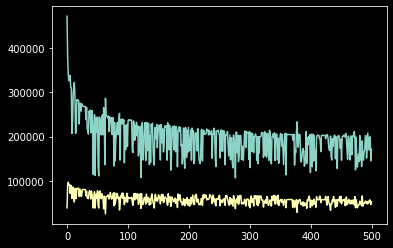

In [4]:
# STU To Do: Implement your logic 
plt.plot(df['Total Pay'])
plt.plot(df['Benefits'])

[4][10 Points] What are the **seven highest Total Pays**? (Yours does not have to match my findings).  

In [5]:
# STU To Do: Implement your logic (Your )
new_df = df.sort_values(['Total Pay'], ascending=False).head(7)
new_df


,ID,Title,Pay,OT Pay,Other Pay,Benefits,Compensation,Employment,Total Pay
0,110532,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,510732.68,PT,471952.64
1,110533,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,479652.21,HOURLY,379399.03
2,110534,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,436224.36,PT,339653.70
5,110537,Asst Med Examiner,270222.04,6009.22,67956.20,71580.48,415767.94,HOURLY,338178.24
3,110535,Chief of Police,307450.04,0.00,19266.72,91302.46,418019.22,FT,326716.76
4,110536,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,417435.10,FT,326233.44
12,110544,Commander 3,184734.01,0.00,137409.09,51940.39,374083.49,PT,322143.10


[5][10 Points] Create the following bar chart for the **seven highest Total Pays**.

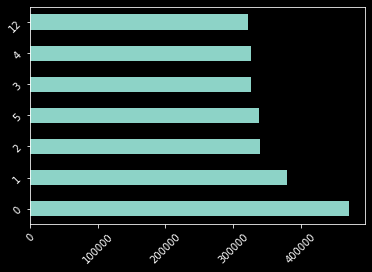

In [6]:
# STU To Do: Implement your logic 
highest = new_df[['Total Pay']]

highest

highest['Total Pay'].plot.barh()
plt.tick_params(rotation=45)
plt.show()


[6][10 Points] What are the Employment status (of your dataset)?

In [7]:
# STU To Do: Implement your logic 
# Your percentage of FT, PT and HOURLY will be different
df.describe()
new_df = df.groupby(['Employment']).count()[['Pay']]
new_df = new_df.reset_index()
new_df

,Employment,Pay
0,FT,403
1,HOURLY,70
2,PT,27


[7][10 Points] Create the following pie chart representing the Employment Status

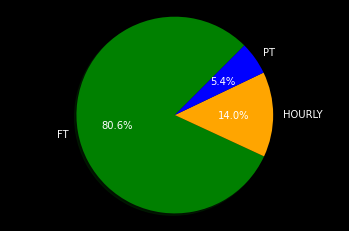

In [8]:
  # STU To Do: Implement your logic 

  # Note: My labels are incorrect.  Did not have a chance to fix it.
fig, ax = plt.subplots()
ax.pie(new_df["Pay"].tolist(), labels=new_df["Employment"].tolist(), colors=["green", "orange", "blue"], autopct='%1.1f%%',
        shadow=True, startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


[8][10 Points] Create a Histogram representing the Benefits between \$10,000 and \$100,000

Text(0, 0.5, 'Frequency')

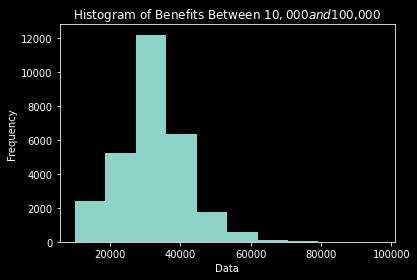

In [9]:
# STU To Do: Implement your logic 
df = pd.read_csv("salaries-14B.csv")

benefit_selection = (10000,100000)
mask = df['Benefits'].between(*benefit_selection)
new_data = df[mask][["Benefits"]]


plt.hist(new_data)
plt.title('Histogram of Benefits Between $10,000 and $100,000')
plt.xlabel('Data')
plt.ylabel('Frequency')



Part B -- UMD API:
Check out the following URL to learn more about the UMD API
*   https://beta.umd.io/
*   



[9][10 Points] Display all of the COMM courses that Professor Aaron Hood has taught (and will be teaching)?

In [10]:
# STU To Do: Implement your logic 
professors = 'https://api.umd.io/v1/professors'


# # 1) Get API
# response = requests.get(professors)     # Get 200 response (Request passed))
# api = response.json()                   # Convert the data into JSON
# #print( json.dumps( api, indent=2))      # Print formatted JSON file




# # 2) First Approach - Convert API to Dataframe and Locate prof=="Aaron Hood" to display its classes
# api_df = pd.DataFrame(api)

# classes = api_df.query('name == "Aaron Hood"')[['taught']].reset_index()  # Extract Column Value Based on Another Column
# ## --> Gives an dataframe with one row of all Aaron Hood's classes

# taught_list = classes['taught'].tolist()    # Take the row and convert it to list
# taught_list = [  subeach for each in taught_list for subeach in each  ]   # Convert Double-list to a Single-list
# classes_df = pd.DataFrame(taught_list)      # Output it in a dataframe
# classes_df




# # 2) Second Approach - Find index of Aaron Hood from the API directly, target professor's taught classes (list of dic), then print 2 ways
# ## Algorithm to find the index of a particular professor in the API
# for i in range(len(api)):
#     if api[i]['name'] == 'Aaron Hood':
#         #print(True)
#         prof_index = i

# ## Professor's dictionary
# prof= api[prof_index]

# ## To target 'taught' classes from 'Aaron Hood'
# classes = prof['taught']
# print(classes)


# ## Print Results:
# ### (2.1) PRINT A STRING
# ## Algorithm to print taught classes: course_id , semester
# for i in range(len(classes)):
#     print(f"Class {i+1}")
#     print("Course ID:"+ " " + classes[i]['course_id'])
#     print("Semester:" + " " + classes[i]['semester'])
#     print("\n")

# ### (2.2) PRINT A DATAFRAME
# ## Print (course_id, semester) in a DataFrame
# df = pd.DataFrame(classes)
# df


# 2) Third Approach
name = 'Aaron Hood'
url = professors + '?name=' + name
r = requests.get(url).json()
# print(json.dumps(r, indent=2))
# for x in range(len(r[0]['taught'])):
#     print(r[0]['taught'][x])

professor_df = pd.DataFrame(r[0])
professor_df



,name,taught
0,Aaron Hood,"{'course_id': 'HESI470', 'semester': '201901'}"
1,Aaron Hood,"{'course_id': 'EDHI338L', 'semester': '201908'}"
2,Aaron Hood,"{'course_id': 'HESI470', 'semester': '202001'}"


[10][10 Points] What are the UMD bus routes?

In [ ]:
# STU To Do: Implement your logic 

professors = 'https://api.umd.io/v1/bus/routes'

response = requests.get(professors)     # Get 200 response (Request passed))
api = response.json()                   # Convert the data into JSON
#print( json.dumps( api, indent=2))      # Print formatted JSON file

df_routes = pd.DataFrame(api)
df_routes

,route_id,title
0,104,104 College Park Metro
1,105,105 Campus Connector
2,108,108 Adelphi
3,109,109 River Road
4,110,Seven Springs Express
5,111,111 Silver Spring
6,113,113 Hyattsville
7,114,114 University View
8,115,115 Orange
9,116,116 Purple


[11][10 Points] Remove any route number (route_id) from each 'title'. The new title should contain "destinations" only. See output.  Don't get stuck here for too long; complete remaining activities first

In [ ]:
# STU To Do: Implement your logic 
new_route = list()
for each in df_routes['title']:
    result = ''.join([i for i in each if not i.isdigit()])
    try:
        new_route.append(str(result).strip())
    except:
        pass
    
df_routes.drop('title', axis=1, inplace=True)
df_routes['new_title'] = new_route
df_routes


# Second Apporach
# df_routes['title'] = df_routes['title'].str.replace('\d+', '')
# df_routes.rename(columns = {'title': 'destinations'}, inplace = True)
# print(df_routes)

,route_id,new_title
0,104,College Park Metro
1,105,Campus Connector
2,108,Adelphi
3,109,River Road
4,110,Seven Springs Express
5,111,Silver Spring
6,113,Hyattsville
7,114,University View
8,115,Orange
9,116,Purple


[12][10 Points] Implement a function that will display all of the available routes for a specified destination

In [ ]:

def show_routes_by_destination(df) :
    # STU To Do: Implement your logic 
    user = input("Enter Destination: ").title()
    
    print(f"Here are the route(s) for {user}")
    for route_id, route in df.itertuples(index=False):
        if route.find(user) >= 0:
            print(f"The route for {route} is {route_id}")  

    
show_routes_by_destination(df_routes)

Here are the route(s) for Park
The route for College Park Metro is 104
The route for Gaithersburg Park & Ride is 141
The route for Columbia Park & Ride is 142
